# University of California Undergraduate Experience Survey Longitudinal Data Analysis
Survey item - "satisfaction with the value of education for the price you're paying"

***
### Data Import and Preparation

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("./data/uc_student_sat_survey_by_year_by_discipline.csv")

In [21]:
df.dtypes

Category            object
Year                 int64
Response            object
Count                int64
Diverge Pct Abs    float64
Diverge Pct        float64
dtype: object

Let's use "Category" and "Year" to set up a hierarchical index, which will allow us to select sensible subsets from the dataframe in a more concise manner.

In [22]:
df= df.set_index(["Category", "Year"])

***
### Explore the Relationship Between "Category" and "Response"
I want to know if there's a correlation between "Category" and the distribution of survey responses, so I'll go ahead and add new columns to make it easier to generate a "Category" x "Response" heatmap.

In [23]:
# get response count for each (Category, Year) group
grouped = df.groupby(["Category", "Year"])["Count"]
df["Category_Yr_Count"] = grouped.transform("sum")
df

Response  Count  Diverge Pct Abs   
Category          Year                                                  
Arts              2022  Somewhat Dissatisfied    395         0.177928  \
                  2020  Somewhat Dissatisfied    455         0.190856   
                  2018  Somewhat Dissatisfied    346         0.175367   
                  2016  Somewhat Dissatisfied    309         0.160187   
                  2014  Somewhat Dissatisfied    329         0.161591   
...                                       ...    ...              ...   
Undeclared /Other 2014         Very Satisfied    912         0.093309   
                  2012         Very Satisfied    722         0.080437   
                  2010         Very Satisfied   1231         0.097013   
                  2008         Very Satisfied   1687         0.133857   
                  2006         Very Satisfied   1731         0.134614   

                        Diverge Pct  Category_Yr_Count  
Category          Year                                  
Arts              2022    -0.177928               2220  
                  2020    -0.190856               2384  
                  2018    -0.175367               1973  
                  2016    -0.160187               1929  
                  2014    -0.161591               2036  
...                             ...                ...  
Undeclared /Other 2014     0.093309               9774  
                  2012     0.080437               8976  
                  2010     0.097013              12689  
                  2008     0.133857              12603  
                  2006     0.134614              12859  

[432 rows x 5 columns]

In [24]:
# For each year, for each category, calcualte the count of each type of survey response / total survey responses
df["Response_Pct"] = df["Count"] / df["Category_Yr_Count"]

Q: How does a student's academic discipine affect their satisfaction with the value of their education.

<AxesSubplot:xlabel='Response', ylabel='Category'>

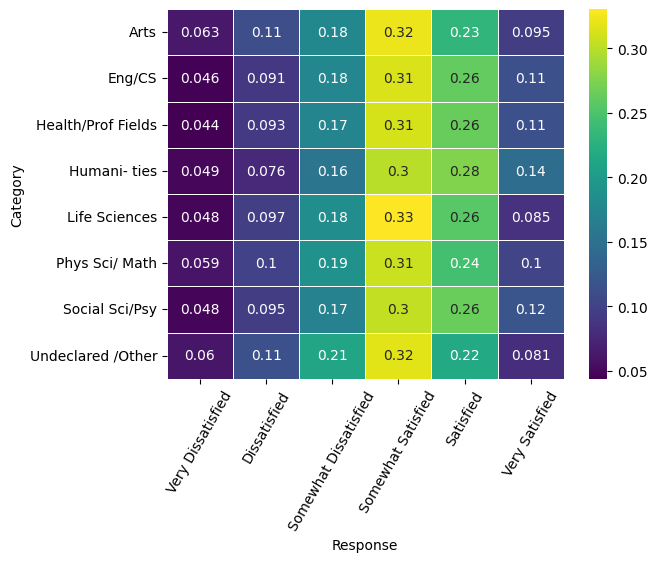

In [25]:
# student satisfaction survey 2022
df_2022 = df.xs(2022, axis="index", level="Year", drop_level=False)
pv = pd.pivot_table(
    df_2022, index="Category", columns="Response", values="Response_Pct"
).loc[:, ["Very Dissatisfied", "Dissatisfied", "Somewhat Dissatisfied", "Somewhat Satisfied", "Satisfied", "Very Satisfied"]]
g = sns.heatmap(pv, annot=True, linewidth=.5, cmap=sns.color_palette("viridis", as_cmap=True))
g.set_xticklabels(g.get_xticklabels(), rotation=60)
g

***
### Visualize the Survey Responses Longitudinally (Time Series)

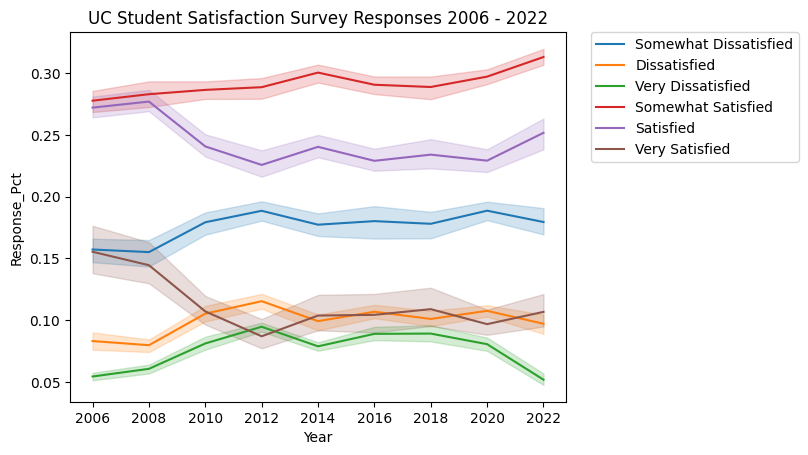

In [26]:
# student satisfaction survey over time
sns.lineplot(data=df, x="Year", y="Response_Pct", hue="Response").set(title="UC Student Satisfaction Survey Responses 2006 - 2022")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

**Note:**<br>
We've visualized the survey responses over time. 
However, it's difficult to interpret the visualization in this format, because viewing the rise and fall of the individual trend lines do not offer any insights into the overall level of student satisfaction in a given year.
We should categorize the responses into two broad categories - "At Least Somewhat Satisfied" and "At Best Somewhat Dissatisfied" - and then visualize the data again.

In [27]:
mapping = {
    "Very Dissatisfied": "At Best Somewhat Dissatisfied",
    "Dissatisfied": "At Best Somewhat Dissatisfied",
    "Somewhat Dissatisfied": "At Best Somewhat Dissatisfied",
    "Somewhat Satisfied" : "At Least Somewhat Satisfied",
    "Satisfied": "At Least Somewhat Satisfied",
    "Very Satisfied": "At Least Somewhat Satisfied"
}

def categorize(response):
    return mapping.get(response, None)

df["Response_Categorized"] = df["Response"].map(categorize)
df

Response  Count  Diverge Pct Abs   
Category          Year                                                  
Arts              2022  Somewhat Dissatisfied    395         0.177928  \
                  2020  Somewhat Dissatisfied    455         0.190856   
                  2018  Somewhat Dissatisfied    346         0.175367   
                  2016  Somewhat Dissatisfied    309         0.160187   
                  2014  Somewhat Dissatisfied    329         0.161591   
...                                       ...    ...              ...   
Undeclared /Other 2014         Very Satisfied    912         0.093309   
                  2012         Very Satisfied    722         0.080437   
                  2010         Very Satisfied   1231         0.097013   
                  2008         Very Satisfied   1687         0.133857   
                  2006         Very Satisfied   1731         0.134614   

                        Diverge Pct  Category_Yr_Count  Response_Pct   
Category          Year                                                 
Arts              2022    -0.177928               2220      0.177928  \
                  2020    -0.190856               2384      0.190856   
                  2018    -0.175367               1973      0.175367   
                  2016    -0.160187               1929      0.160187   
                  2014    -0.161591               2036      0.161591   
...                             ...                ...           ...   
Undeclared /Other 2014     0.093309               9774      0.093309   
                  2012     0.080437               8976      0.080437   
                  2010     0.097013              12689      0.097013   
                  2008     0.133857              12603      0.133857   
                  2006     0.134614              12859      0.134614   

                                 Response_Categorized  
Category          Year                                 
Arts              2022  At Best Somewhat Dissatisfied  
                  2020  At Best Somewhat Dissatisfied  
                  2018  At Best Somewhat Dissatisfied  
                  2016  At Best Somewhat Dissatisfied  
                  2014  At Best Somewhat Dissatisfied  
...                                               ...  
Undeclared /Other 2014    At Least Somewhat Satisfied  
                  2012    At Least Somewhat Satisfied  
                  2010    At Least Somewhat Satisfied  
                  2008    At Least Somewhat Satisfied  
                  2006    At Least Somewhat Satisfied  

[432 rows x 7 columns]

In [28]:
grouped = df.groupby(["Year", "Response_Categorized"])
res_type_by_year = grouped["Count"].sum()
res_type_by_year = res_type_by_year.reset_index(level="Response_Categorized")
res_type_by_year = res_type_by_year.pivot(columns="Response_Categorized", values="Count")
res_type_by_year

Response_Categorized,At Best Somewhat Dissatisfied,At Least Somewhat Satisfied
Year,,
2006,16739,40368
2008,18546,43717
2010,23176,39721
2012,22235,33027
2014,20823,37008
2016,21298,34634
2018,21828,36881
2020,25465,41825
2022,20003,41990


In [29]:
# Normalize the data in each row so they sum to 1. This allows us to account for the differences in total survey responses.
res_pct_by_year = res_type_by_year.div(res_type_by_year.sum(axis="columns"), axis="index")
# Wrangle df into tidy long form data where each col is a variable and each row is an observation.
res_pct_by_year = res_pct_by_year.stack("Response_Categorized").reset_index()
res_pct_by_year.rename(columns = {0:'Proportion'}, inplace = True)
res_pct_by_year

,Year,Response_Categorized,Proportion
0,2006,At Best Somewhat Dissatisfied,0.293116
1,2006,At Least Somewhat Satisfied,0.706884
2,2008,At Best Somewhat Dissatisfied,0.297866
3,2008,At Least Somewhat Satisfied,0.702134
4,2010,At Best Somewhat Dissatisfied,0.368475
5,2010,At Least Somewhat Satisfied,0.631525
6,2012,At Best Somewhat Dissatisfied,0.402356
7,2012,At Least Somewhat Satisfied,0.597644
8,2014,At Best Somewhat Dissatisfied,0.360066
9,2014,At Least Somewhat Satisfied,0.639934


<AxesSubplot:title={'center':'UC Student Satisfaction Survey Responses 2006 - 2022'}, xlabel='Year', ylabel='Proportion'>

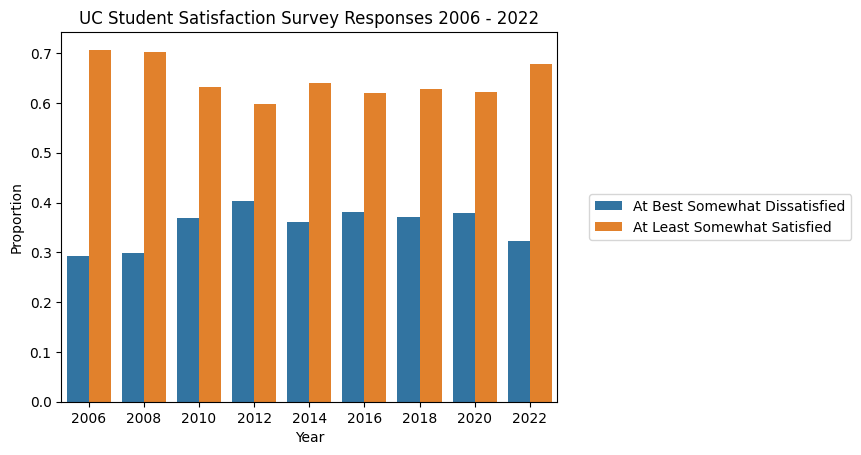

In [32]:
g = sns.barplot(data=res_pct_by_year, x="Year", y="Proportion", hue="Response_Categorized")
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
g.set_title("UC Student Satisfaction Survey Responses 2006 - 2022")
g